In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Generate samples with different sizes (stored in sizelist) from 5 distributions: Gaussian,Poisson,
#Binomial,Chi-square and Uniform distribution (my choice).
mean=100
sizelist=randint(11,2000,100)
normalist=[]
poilist=[]
binolist=[]
chilist=[]
unilist=[]
for i in range(len(sizelist)):
    normalist.append(np.random.randn(mean,sizelist[i])+mean)
    poilist.append(np.random.poisson(mean,sizelist[i]))
    binolist.append(np.random.binomial(10*mean,0.1,sizelist[i]))
    chilist.append(np.random.chisquare(mean,sizelist[i]))
    unilist.append(np.random.uniform(0,2*mean,sizelist[i]))

In [3]:
normalmeans=[]
poimeans=[]
binomeans=[]
chimeans=[]
unimeans=[]
for i in range(len(sizelist)):
    normalmeans.append(normalist[i].mean())
    poimeans.append(poilist[i].mean())
    binomeans.append(binolist[i].mean())
    chimeans.append(chilist[i].mean())
    unimeans.append(unilist[i].mean())

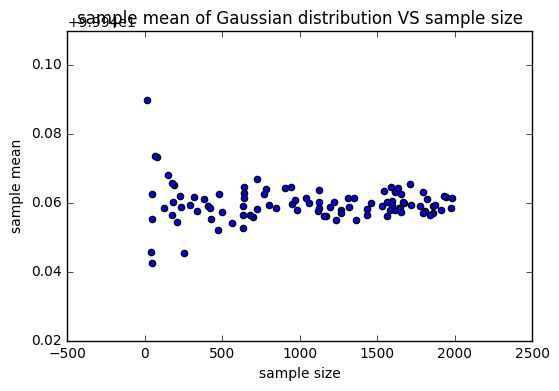

In [4]:
plt.clf()
pl.scatter(sizelist,normalmeans)
#pl.ylim([99,101])
pl.xlabel('sample size')
pl.ylabel('sample mean')
pl.title('sample mean of Gaussian distribution VS sample size')

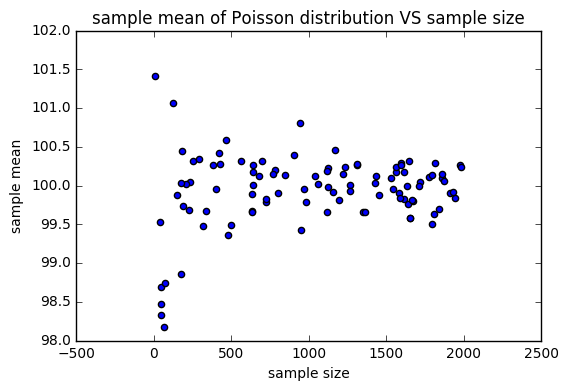

In [5]:
pl.scatter(sizelist,poimeans)
pl.xlabel('sample size')
pl.ylabel('sample mean')
pl.title('sample mean of Poisson distribution VS sample size')

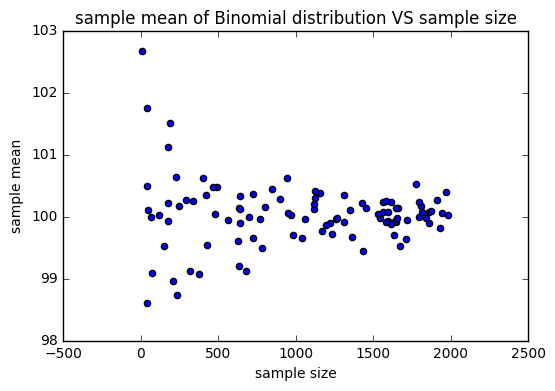

In [6]:
pl.scatter(sizelist,binomeans)
pl.xlabel('sample size')
pl.ylabel('sample mean')
pl.title('sample mean of Binomial distribution VS sample size')

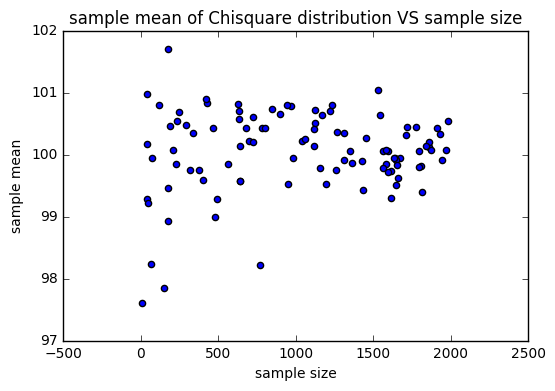

In [7]:
pl.scatter(sizelist,chimeans)
pl.xlabel('sample size')
pl.ylabel('sample mean')
pl.title('sample mean of Chisquare distribution VS sample size')

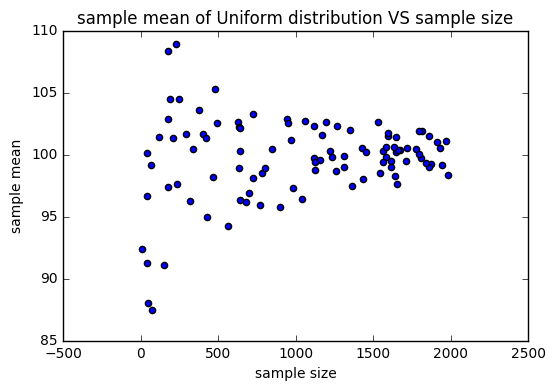

In [8]:
pl.scatter(sizelist,unimeans)
pl.xlabel('sample size')
pl.ylabel('sample mean')
pl.title('sample mean of Uniform distribution VS sample size')

### describe the behavior
#### As the sample size increases, the sample mean approaches to their theoretical mean (in this case is 100).

In [9]:
#Create a list that stored all 500 means.
all_mean=unimeans+chimeans+binomeans+poimeans+normalmeans

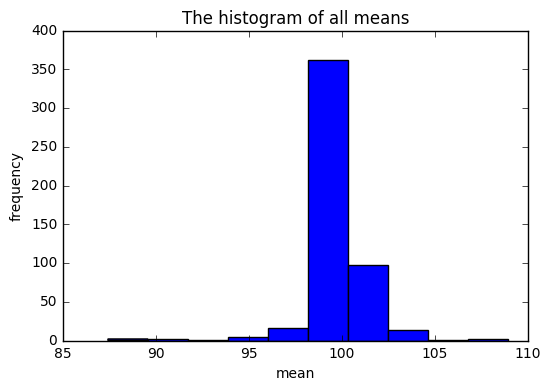

In [10]:
pl.hist(all_mean)
pl.xlabel('mean')
pl.ylabel('frequency')
pl.title('The histogram of all means')

In [18]:
#extra credit
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [20]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 100., 1.]

In [21]:
hist, bin_edges = np.histogram(all_mean, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

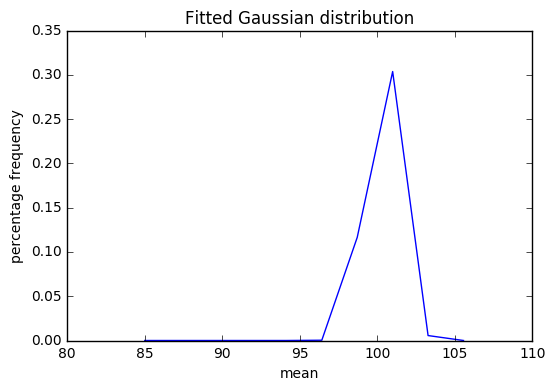

In [25]:
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

#plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')
plt.xlabel("mean")
plt.ylabel("percentage frequency")
plt.title("Fitted Gaussian distribution")
plt.show()

In [26]:
print ('Fitted mean =', coeff[1])
print ('Fitted standard deviation = ', coeff[2])

Fitted mean = 100.293381131
Fitted standard deviation =  1.02657205421
